In [1]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Load model and image
model_path = "../algorithm_implementation/model_1/Shrimp_model_1.h5"
target_path = "horina.jpg"

model = load_model(model_path)
classes = ['Bagda', 'Deshi', 'Golda', 'Horina']

# Load and preprocess image
img = image.load_img(target_path, target_size=(224, 224))
img_array = np.array(img) / 255.0  # Normalize to 0-1 for model
img_batch = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_batch)
max_ind = np.argmax(prediction)
labelName = classes[max_ind]
print(f"Predicted class: {labelName}")
print(f"Prediction confidence: {prediction[0][max_ind]:.4f}")

# SHAP Explainability - Manual Gradient Computation
print("\n" + "="*50)
print("Manual Gradient-based Explanation")
print("="*50)

def get_gradients(model, images, class_idx=None):
    """Calculate gradients for interpretability"""
    images = tf.cast(images, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        class_output = predictions[:, class_idx]
    
    gradients = tape.gradient(class_output, images)
    return gradients, class_idx

# Get gradients for the predicted class
gradients, pred_class = get_gradients(model, img_batch)
gradients = gradients.numpy()[0]  # Remove batch dimension
grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))

# Prepare output directory
output_dir = "shap_output"
os.makedirs(output_dir, exist_ok=True)

# Save original image with high quality
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(img_array)
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'original_image.png'), bbox_inches='tight', pad_inches=0.1)
plt.close()

# Save gradient magnitude
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(grad_magnitude, cmap='hot')
plt.axis('off')
plt.colorbar(fraction=0.046, pad=0.04)
plt.savefig(os.path.join(output_dir, 'gradient_magnitude.png'), bbox_inches='tight', pad_inches=0.1)
plt.close()

# Save gradient overlay
plt.figure(figsize=(8, 8), dpi=300)
plt.imshow(img_array)
plt.imshow(grad_magnitude, cmap='hot', alpha=0.5)
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'gradient_overlay.png'), bbox_inches='tight', pad_inches=0.1)
plt.close()

# Save individual channel gradients
color_maps = ['Reds', 'Greens', 'Blues']
channel_names = ['red_gradient.png', 'green_gradient.png', 'blue_gradient.png']

for i in range(3):
    plt.figure(figsize=(8, 8), dpi=300)
    plt.imshow(np.abs(gradients[:, :, i]), cmap=color_maps[i])
    plt.axis('off')
    plt.colorbar(fraction=0.046, pad=0.04)
    plt.savefig(os.path.join(output_dir, channel_names[i]), bbox_inches='tight', pad_inches=0.1)
    plt.close()

print(f"✅ High-quality images saved to: {output_dir}")


1/1 [==============================] - 3s 3s/step
Predicted class: Horina
Prediction confidence: 0.9924

Manual Gradient-based Explanation
✅ High-quality images saved to: shap_output


1/1 [==============================] - 0s 208ms/step
Predicted class: Deshi
Prediction confidence: 0.9996

Manual Gradient-based Explanation


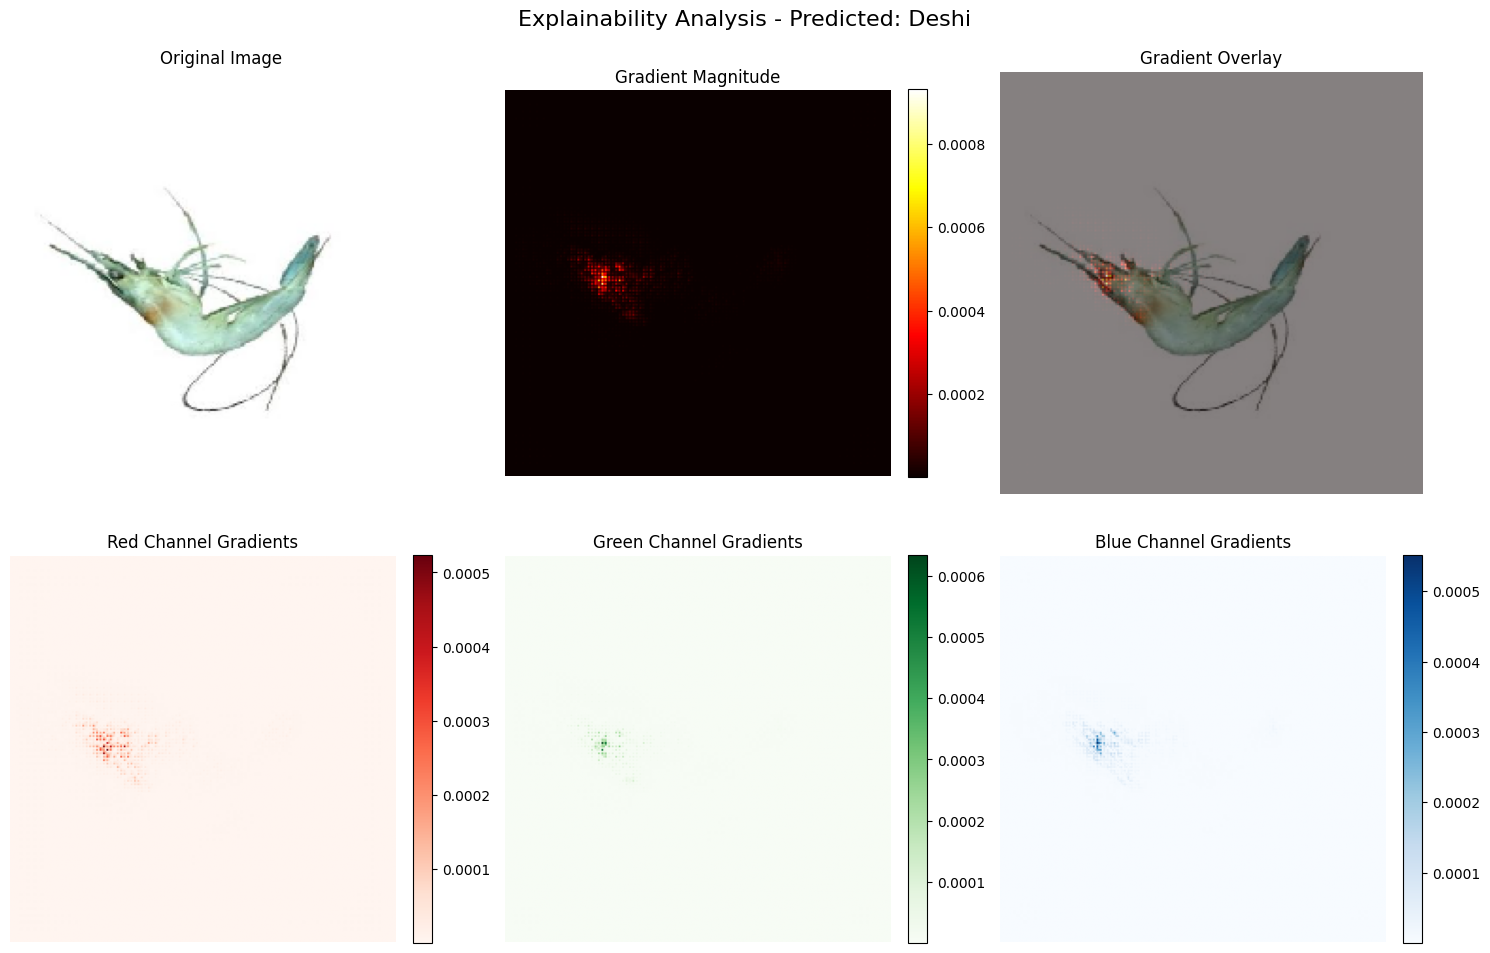

In [7]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import shap
import matplotlib.pyplot as plt
import os

# Load model and image
model_path = "../algorithm_implementation/model_1/Shrimp_model_1.h5"
target_path = "deshi.jpeg"

model = load_model(model_path)
classes = ['Bagda', 'Deshi', 'Golda', 'Horina']

# Load and preprocess image
img = image.load_img(target_path, target_size=(224, 224))
img_array = np.array(img) / 255.0  # Normalize to 0-1 for model
img_batch = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_batch)
max_ind = np.argmax(prediction)
labelName = classes[max_ind]
print(f"Predicted class: {labelName}")
print(f"Prediction confidence: {prediction[0][max_ind]:.4f}")


# SHAP Explainability - METHOD 2: Manual Gradient Computation
print("\n" + "="*50)
print("Manual Gradient-based Explanation")
print("="*50)

def get_gradients(model, images, class_idx=None):
    """Calculate gradients for interpretability"""
    images = tf.cast(images, tf.float32)
    
    with tf.GradientTape() as tape:
        tape.watch(images)
        predictions = model(images)
        if class_idx is None:
            class_idx = tf.argmax(predictions[0])
        class_output = predictions[:, class_idx]
    
    gradients = tape.gradient(class_output, images)
    return gradients, class_idx

# Get gradients for the predicted class
gradients, pred_class = get_gradients(model, img_batch)
gradients = gradients.numpy()[0]  # Remove batch dimension

# Create visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle(f'Explainability Analysis - Predicted: {labelName}', fontsize=16)

# Original image
axes[0, 0].imshow(img_array)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Gradient magnitude
grad_magnitude = np.sqrt(np.sum(gradients**2, axis=2))
im1 = axes[0, 1].imshow(grad_magnitude, cmap='hot')
axes[0, 1].set_title('Gradient Magnitude')
axes[0, 1].axis('off')
plt.colorbar(im1, ax=axes[0, 1], fraction=0.046, pad=0.04)

# Gradient overlay
axes[0, 2].imshow(img_array)
axes[0, 2].imshow(grad_magnitude, cmap='hot', alpha=0.5)
axes[0, 2].set_title('Gradient Overlay')
axes[0, 2].axis('off')

# Individual color channel gradients
colors = ['Reds', 'Greens', 'Blues']
channel_names = ['Red Channel', 'Green Channel', 'Blue Channel']

for i in range(3):
    im = axes[1, i].imshow(np.abs(gradients[:, :, i]), cmap=colors[i])
    axes[1, i].set_title(f'{channel_names[i]} Gradients')
    axes[1, i].axis('off')
    plt.colorbar(im, ax=axes[1, i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()

In [ ]:
## grad cam

1/1 [==============================] - 0s 206ms/step
Predicted class: Deshi (Confidence: 0.9996)


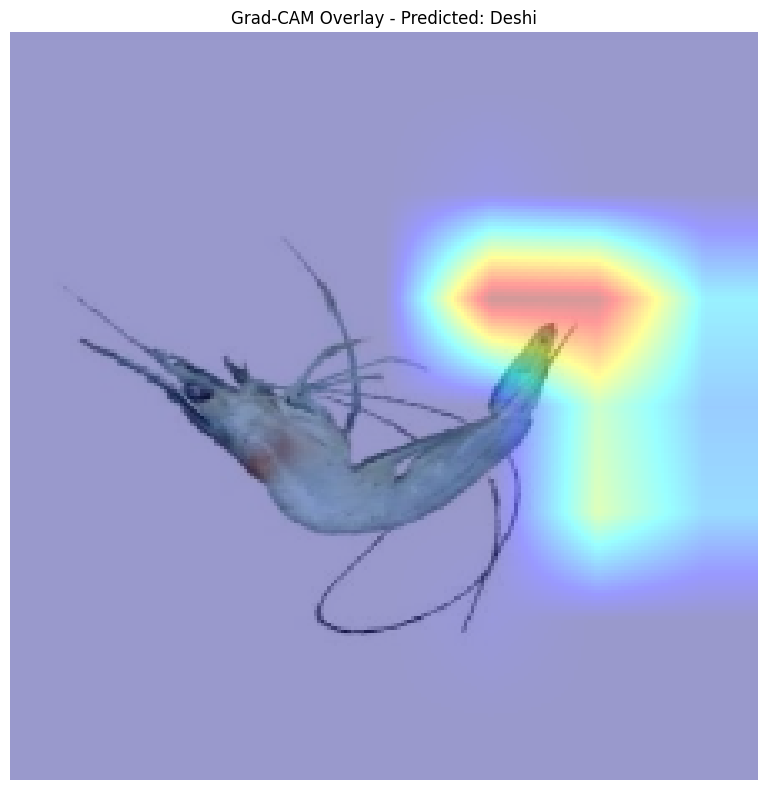

In [6]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Load model and image
model_path = "../algorithm_implementation/model_1/Shrimp_model_1.h5"
target_path = "deshi.jpeg"
model = load_model(model_path)
classes = ['Bagda', 'Deshi', 'Golda', 'Horina']

# Preprocess image
img = image.load_img(target_path, target_size=(224, 224))
img_array = np.array(img) / 255.0
img_batch = np.expand_dims(img_array, axis=0)

# Predict
predictions = model.predict(img_batch)
predicted_class = np.argmax(predictions[0])
label = classes[predicted_class]
print(f"Predicted class: {label} (Confidence: {predictions[0][predicted_class]:.4f})")

# Find last convolutional layer
last_conv_layer_name = None
for layer in reversed(model.layers):
    if isinstance(layer, tf.keras.layers.Conv2D):
        last_conv_layer_name = layer.name
        break

if last_conv_layer_name is None:
    raise ValueError("No convolutional layer found in the model.")

# Grad-CAM function
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = tf.keras.models.Model(
        [model.inputs], 
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(predictions[0])
        class_output = predictions[:, pred_index]

    grads = tape.gradient(class_output, conv_outputs)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    heatmap = conv_outputs @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Generate Grad-CAM heatmap
heatmap = make_gradcam_heatmap(img_batch, model, last_conv_layer_name)

# Load original image again using OpenCV for overlay
img_cv = cv2.imread(target_path)
img_cv = cv2.resize(img_cv, (224, 224))
heatmap_resized = cv2.resize(heatmap, (img_cv.shape[1], img_cv.shape[0]))
heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
overlay = cv2.addWeighted(img_cv, 0.6, heatmap_colored, 0.4, 0)

# Create output directory
output_dir = "gradcam_output"
os.makedirs(output_dir, exist_ok=True)

# Save images
cv2.imwrite(os.path.join(output_dir, "original.jpg"), img_cv)
cv2.imwrite(os.path.join(output_dir, "gradcam_heatmap.jpg"), heatmap_colored)
cv2.imwrite(os.path.join(output_dir, "gradcam_overlay.jpg"), overlay)

# Show overlay using matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
plt.title(f"Grad-CAM Overlay - Predicted: {label}")
plt.axis('off')
plt.tight_layout()
plt.savefig(os.path.join(output_dir, "gradcam_matplotlib.png"), dpi=300, bbox_inches='tight')
plt.show()
